In [112]:
import pandas as pd
import gensim.downloader as api
import nltk 
from nltk.corpus import stopwords
import pprint
import sklearn.cluster 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine



In [113]:
# Load GLoVe model
glove_model = api.load("glove-wiki-gigaword-50")

In [114]:
# load text data pre-process
with open('morrison-beloved.txt', 'r') as f:
    data = f.read()

    

In [115]:
# pre-process text data
sentences = nltk.sent_tokenize(data)
words = [nltk.word_tokenize(sentence) for sentence in sentences]
stop_words = set(stopwords.words('english'))
words = [[w for w in word if not w in stop_words] for word in words]
words = [[w for w in word if w.isalpha()] for word in words]
words = [[w for w in word if len(w) > 2] for word in words]
words = [[w.lower() for w in word] for word in words]
words = [word for word in words if word]
words = [list(set(word)) for word in words]
words = [word for sublist in words for word in sublist]
words = list(set(words))

print(words)

['parts', 'territories', 'cape', 'aisle', 'unfastened', 'visited', 'distraction', 'stared', 'glory', 'otherwise', 'rooms', 'wings', 'favored', 'precious', 'visitations', 'vine', 'blackened', 'kettle', 'rustle', 'meddle', 'praise', 'odor', 'necks', 'scent', 'sam', 'future', 'avoid', 'anywhere', 'squinches', 'shadowy', 'gulped', 'picking', 'introduction', 'confirmed', 'anticipated', 'whined', 'unclasps', 'harmonious', 'sleeves', 'pews', 'hairline', 'coiled', 'horns', 'bottoms', 'price', 'sidewalk', 'steadily', 'horses', 'freak', 'heeded', 'ceiling', 'rib', 'biggest', 'measured', 'sun', 'ferried', 'groaned', 'accidents', 'pinkish', 'thinning', 'slanting', 'length', 'done', 'left', 'passing', 'leftover', 'ironed', 'coaxing', 'indiscriminately', 'unmistakably', 'heavier', 'faithful', 'branch', 'merry', 'reckon', 'skylight', 'gardener', 'whatsoever', 'excuses', 'unlocking', 'slop', 'understanding', 'stamp', 'mount', 'happen', 'frame', 'firmly', 'convince', 'benefit', 'filthy', 'mania', 'fair

In [116]:
# create word vectors
word_vectors = [glove_model[w] for w in words if w in glove_model.key_to_index] # get word vectors for words in the model vocabulary 



In [117]:
# Convert word vectors to numpy array
word_vectors = np.array(word_vectors)


In [118]:
# Create a t-SNE model to reduce the dimensions of the word vectors to 2 or 3

tsne_model = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', random_state=42)
new_values = tsne_model.fit_transform(word_vectors)

KeyboardInterrupt: 

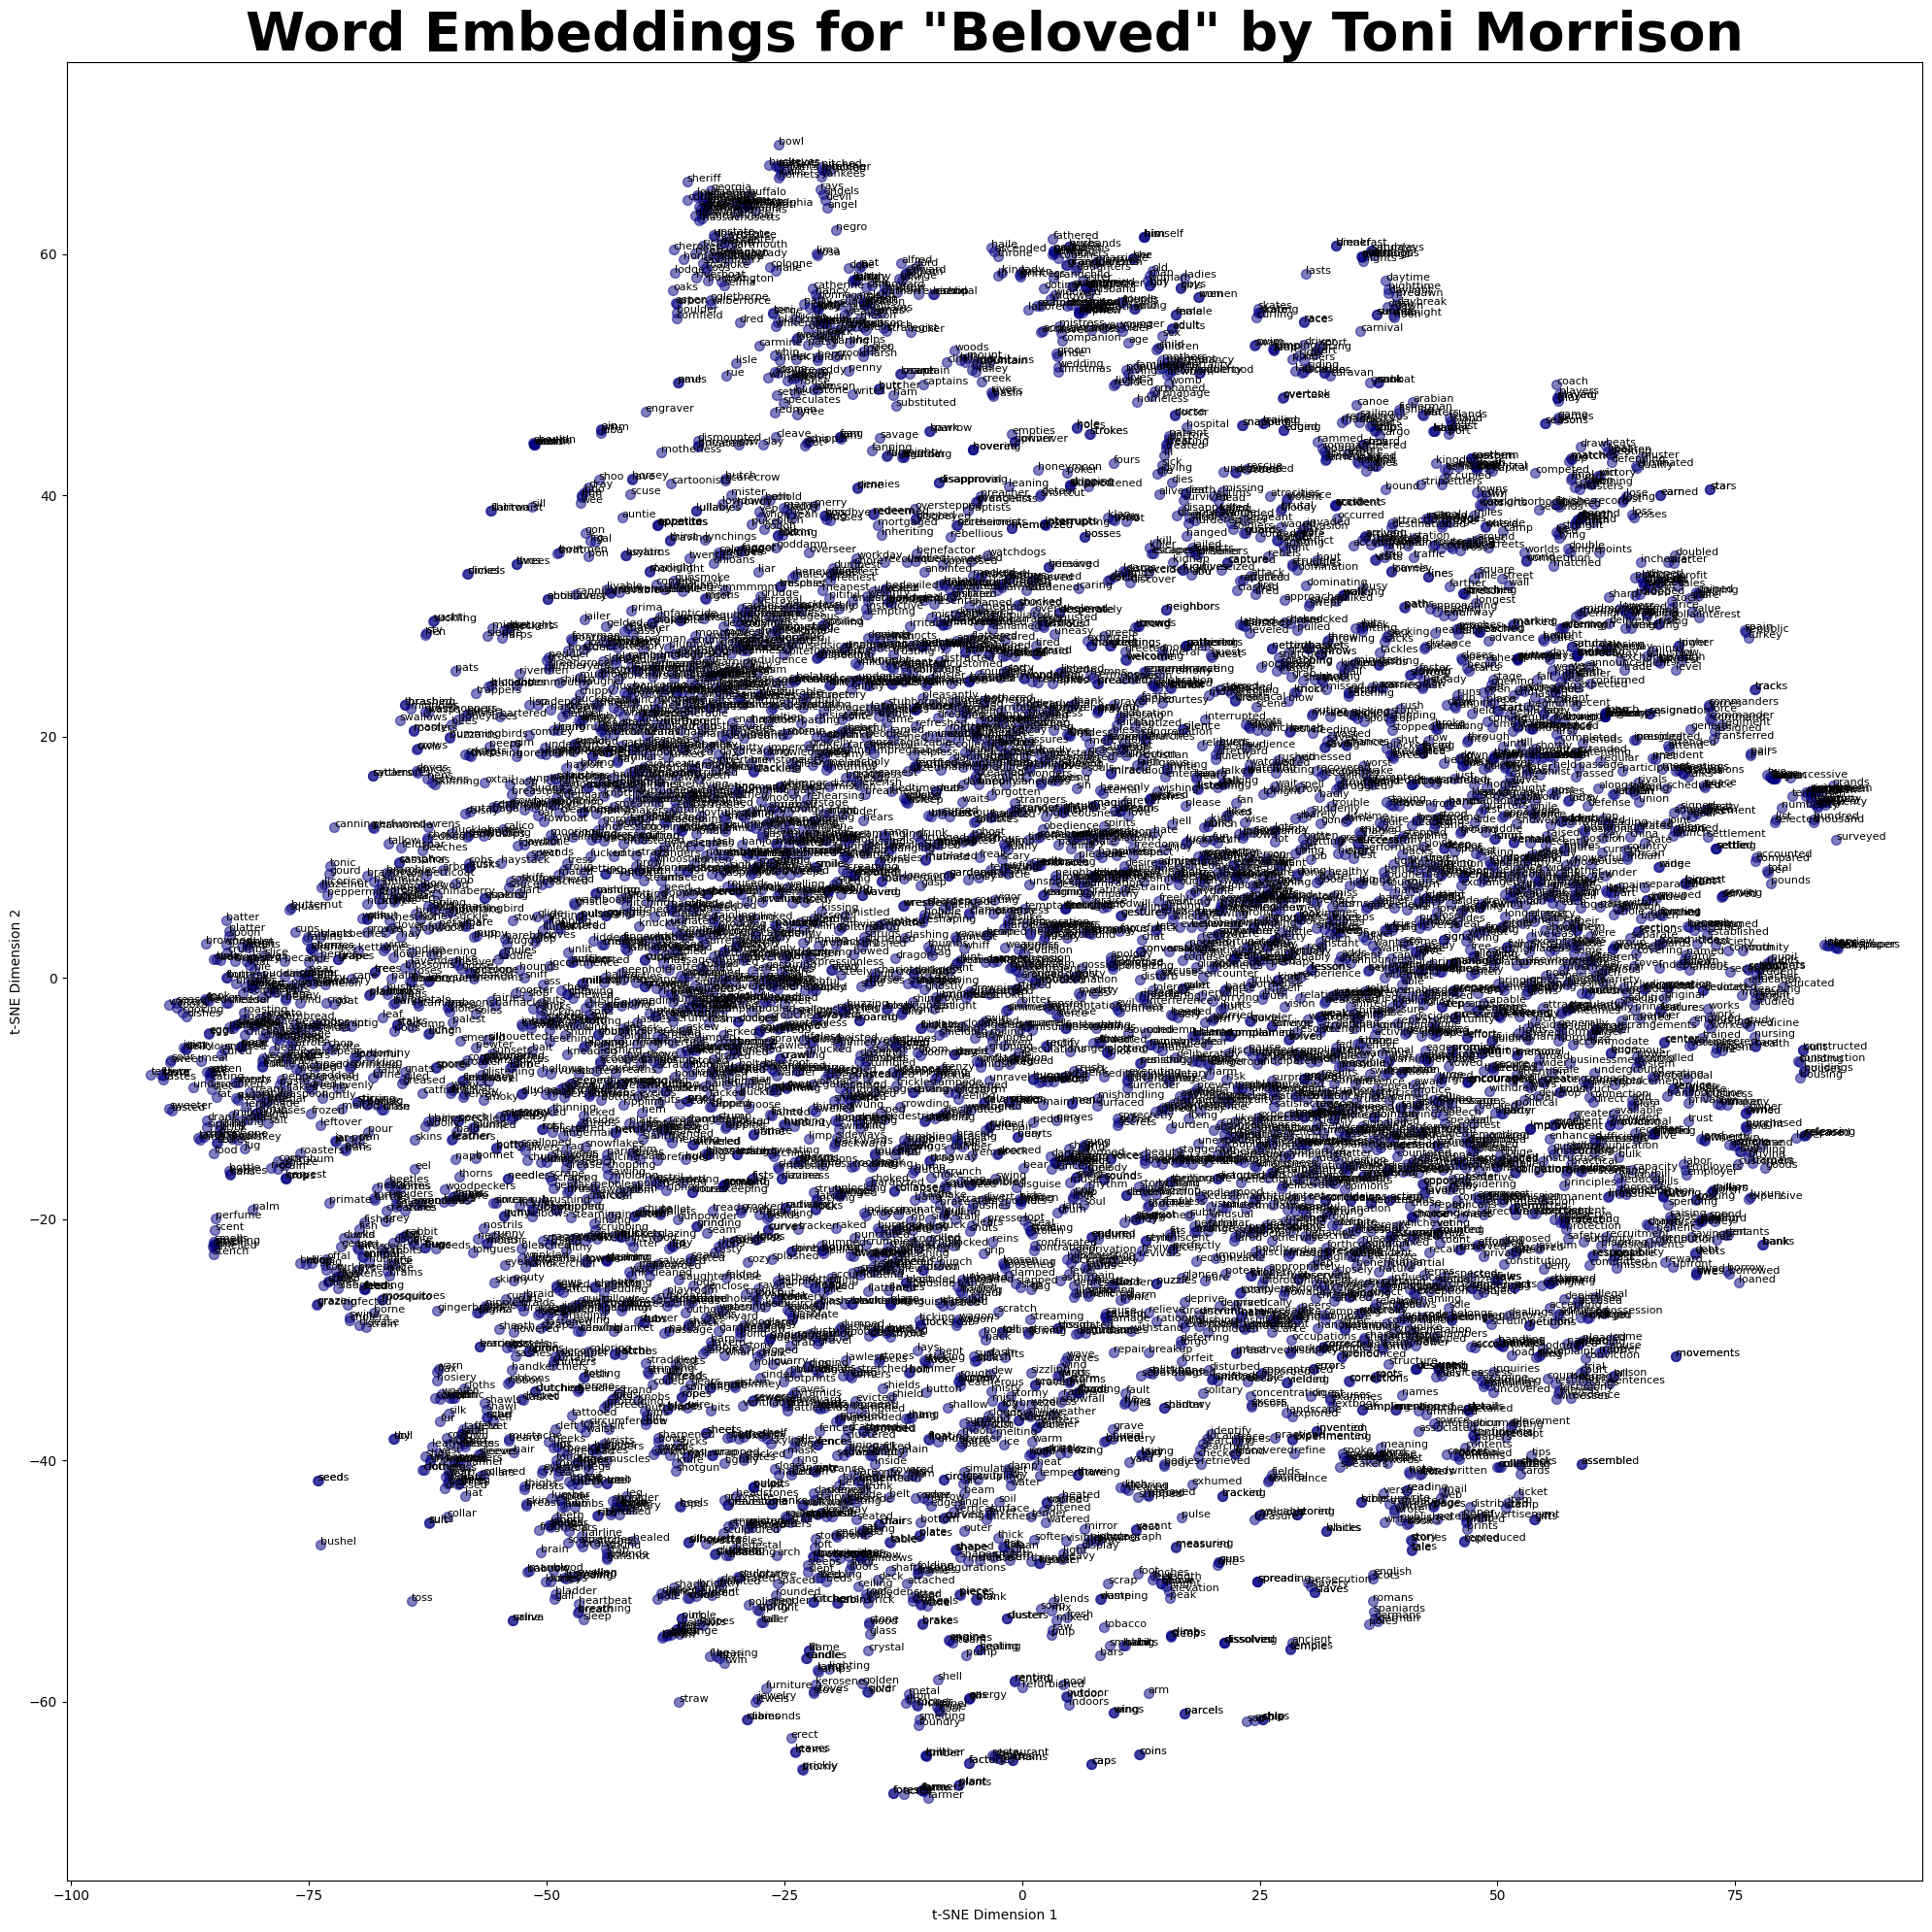

In [ ]:
# Get word vectors for all words in the vocabulary
words = [word for word in words if word in glove_model.key_to_index]
word_vectors = [glove_model[w] for w in words]

# Convert word_vectors list to numpy array
word_vectors_np = np.array(word_vectors)

# Create a t-SNE model to reduce the dimensions of the word vectors to 2
tsne_model = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', random_state=42)
new_values = tsne_model.fit_transform(word_vectors_np)

# Create a scatter plot of the word vectors with the words labeled at the corresponding points
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(new_values[:, 0], new_values[:, 1], s=50, alpha=0.5, color='navy')

for i, word in enumerate(words):
    ax.annotate(word, xy=(new_values[i, 0], new_values[i, 1]), fontsize=8)

ax.set_title('Word Embeddings for "Beloved" by Toni Morrison', fontsize=40, fontweight='bold')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_facecolor('white')
fig.tight_layout()

plt.show()


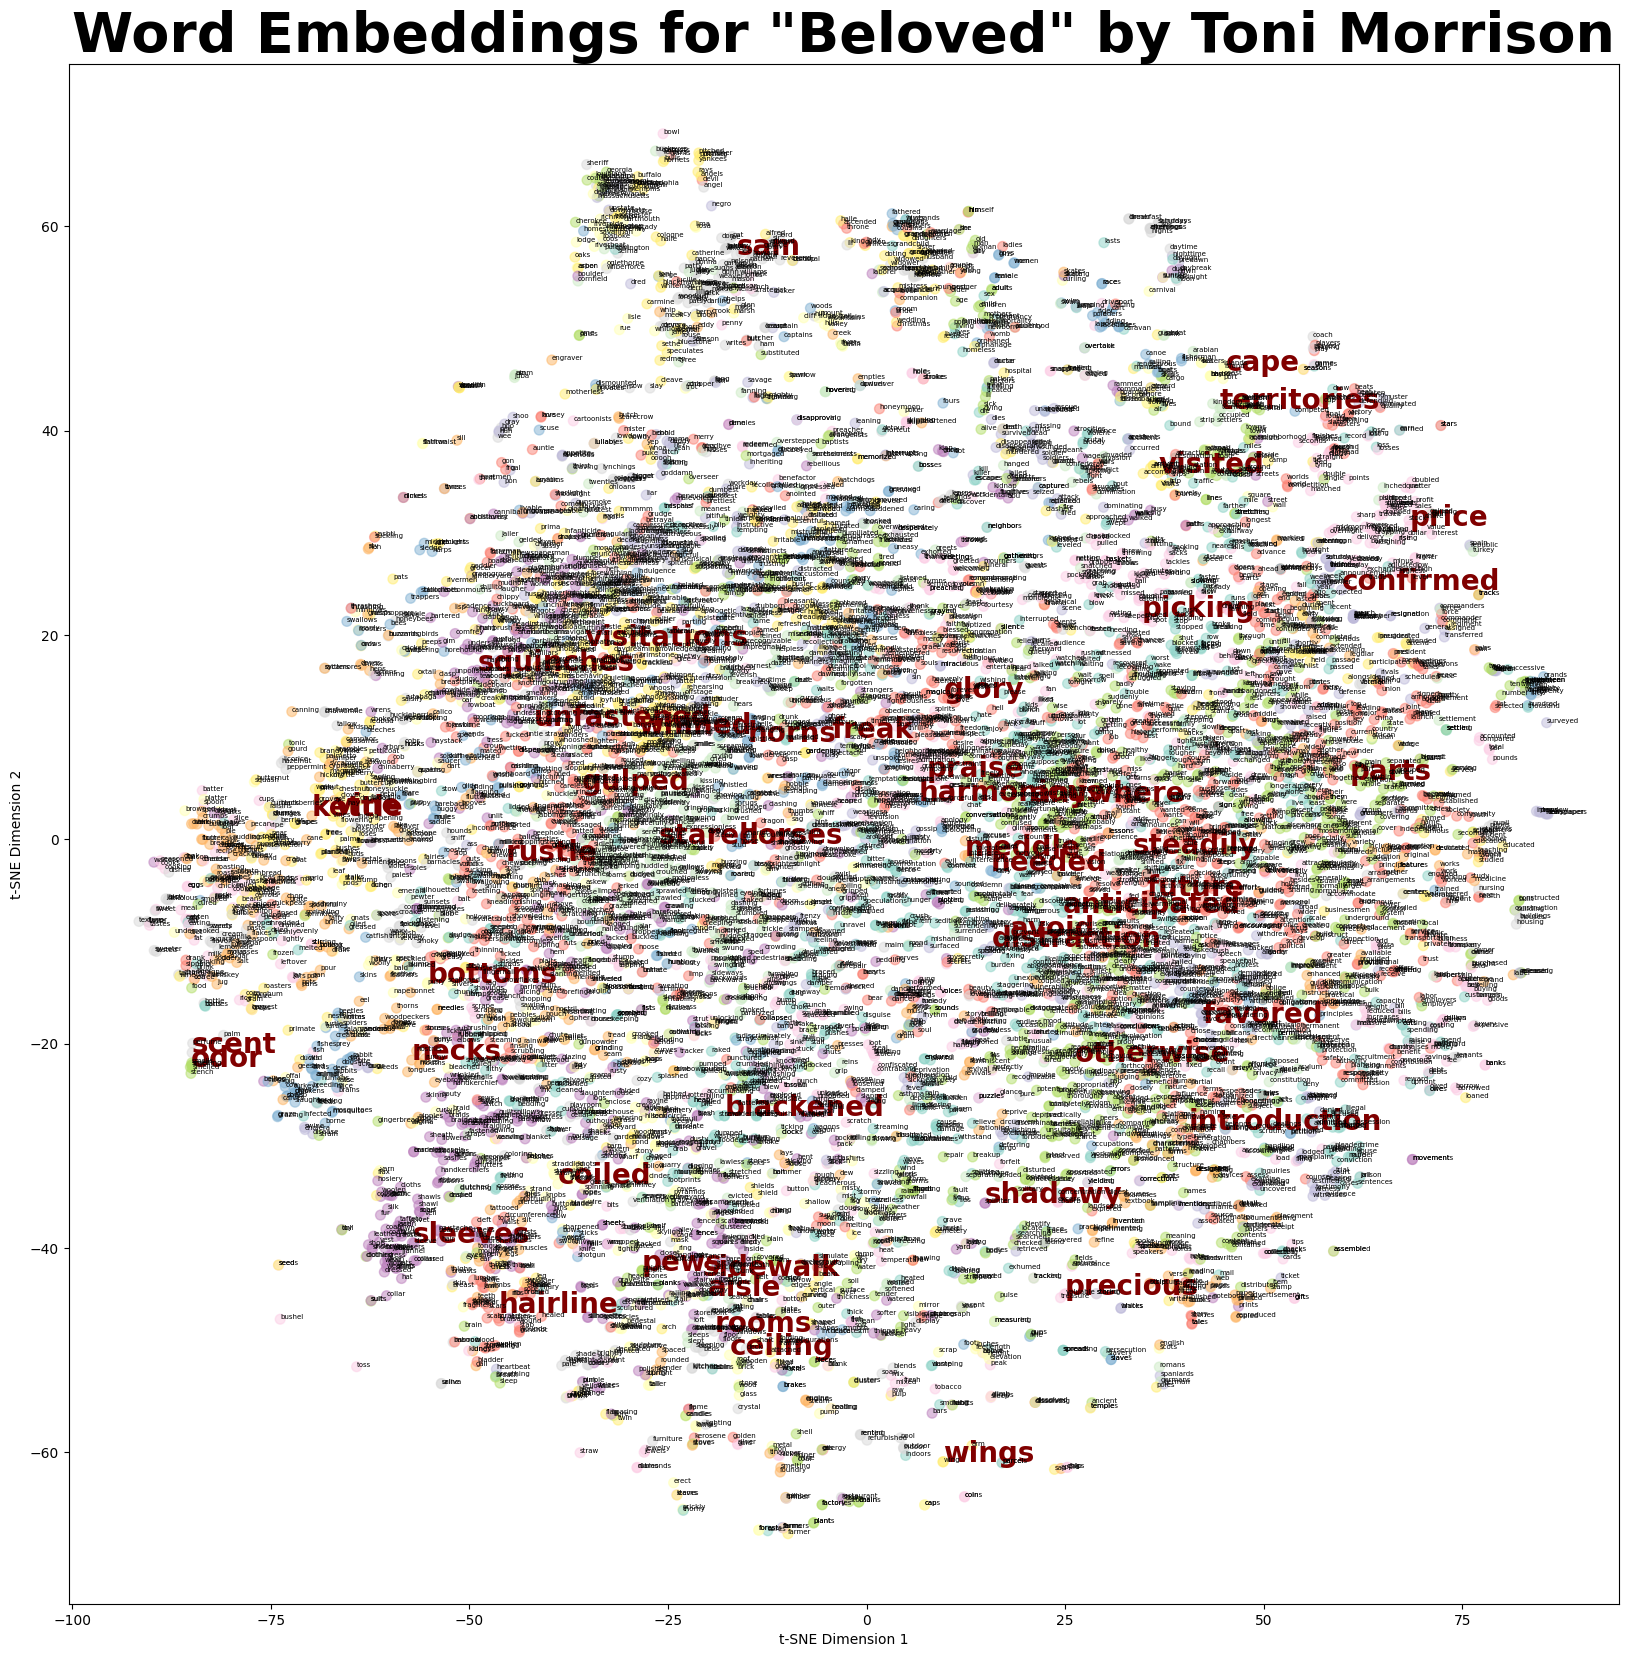

In [ ]:
# Get the most common words in the text
word_frequencies = nltk.FreqDist(words)
most_common_words = [word for word, _ in word_frequencies.most_common(50)]

from sklearn.preprocessing import LabelEncoder

# Calculate cosine similarity between each word in the vocabulary and the most common words
word_colors = []
for w in words:
    similarity_scores = [1 - cosine(glove_model[w], glove_model[common_word]) for common_word in most_common_words]
    closest_common_word = most_common_words[np.argmax(similarity_scores)]
    word_colors.append(closest_common_word)

# Convert word_vectors and word_colors lists to numpy arrays
word_vectors_np = np.array(word_vectors)
word_colors_np = LabelEncoder().fit_transform(word_colors)

# Create a t-SNE model to reduce the dimensions of the word vectors to 2
tsne_model = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', random_state=42)
new_values = tsne_model.fit_transform(word_vectors_np)

# Create a scatter plot of the word vectors with the words labeled at the corresponding points
fig, ax = plt.subplots(figsize=(20, 20))
scatter = ax.scatter(new_values[:, 0], new_values[:, 1], s=50, alpha=0.5, c=word_colors_np, cmap='Set3')

# Annotate most common words in bold
for i, word in enumerate(words):
    if word in most_common_words:
        ax.annotate(word, xy=(new_values[i, 0], new_values[i, 1]), fontsize=20, fontweight='bold', color='maroon')
    else:
        ax.annotate(word, xy=(new_values[i, 0], new_values[i, 1]), fontsize=5, color='black')

# Set plot title and axis labels
ax.set_title('Word Embeddings for "Beloved" by Toni Morrison', fontsize=40, fontweight='bold')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')

plt.show()


In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot

# Create a t-SNE model to reduce the dimensions of the word vectors to 3
tsne_model = TSNE(n_components=3, perplexity=30, learning_rate=200, init='pca', random_state=42)
new_values = tsne_model.fit_transform(word_vectors_np)

# Get the most common words in the text
word_frequencies = nltk.FreqDist(words)
most_common_words = [word for word, _ in word_frequencies.most_common(20)]

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=new_values[:, 0],
    y=new_values[:, 1],
    z=new_values[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=word_colors_np,
        colorscale='Viridis',
        cmin=min(word_colors_np),
        cmax=max(word_colors_np),
        opacity=0.8
    ),
    text=words,
    hoverinfo='text'
)

# Create a separate trace for each of the most common words
common_word_traces = []
for common_word in most_common_words:
    common_word_indices = [i for i, w in enumerate(words) if w == common_word]
    common_word_trace = go.Scatter3d(
        x=new_values[common_word_indices, 0],
        y=new_values[common_word_indices, 1],
        z=new_values[common_word_indices, 2],
        mode='markers+text',
        marker=dict(
            size=10,
            color='red',
            opacity=0.8
        ),
        text=[common_word] * len(common_word_indices),
        textposition='top center',
        hoverinfo='none'
    )
    common_word_traces.append(common_word_trace)

# Create the layout for the plot
layout = go.Layout(
    title='Word Embeddings for "Beloved" by Toni Morrison',
    scene=dict(
        xaxis=dict(title='t-SNE Dimension 1'),
        yaxis=dict(title='t-SNE Dimension 2'),
        zaxis=dict(title='t-SNE Dimension 3')
    ),
    showlegend=False
)

# Create the figure and plot it
fig = go.Figure(data=[trace] + common_word_traces, layout=layout)
plot(fig)



'temp-plot.html'

In [126]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create the character co-occurrence graph
def create_character_graph(text, window_size=5):
    # Initialize an empty graph
    G = nx.Graph()

    # Split the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Loop over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = nltk.word_tokenize(sentence)

        # Loop over each pair of adjacent words within the window size
        for i in range(len(words) - window_size):
            for j in range(i + 1, i + window_size):
                # Add an edge between the two words in the graph
                if words[i].isalpha() and words[j].isalpha():
                    if words[i] not in G:
                        G.add_node(words[i])
                    if words[j] not in G:
                        G.add_node(words[j])
                    if G.has_edge(words[i], words[j]):
                        G[words[i]][words[j]]['weight'] += 1
                    else:
                        G.add_edge(words[i], words[j], weight=1)

    return G

# Create the character co-occurrence graph
G = create_character_graph(words)

# Compute the layout of the graph
pos = nx.spring_layout(G)

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1)

# Add labels to the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

# Set the plot title and axis labels
plt.title('Character Co-occurrence Graph for "Beloved" by Toni Morrison')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


TypeError: expected string or bytes-like object